In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
X = df.values
X.shape

(569, 30)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [7]:
from sklearn.decomposition import PCA

pca_30 = PCA(n_components=30, random_state=42)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

print("variance explained by 30 components: ", sum(pca_30.explained_variance_ratio_ * 100))

variance explained by 30 components:  99.99999999999999


In [8]:
np.cumsum(pca_30.explained_variance_ratio_ * 100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

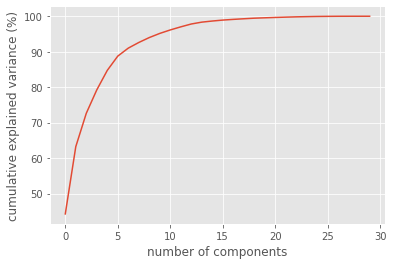

In [10]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_ * 100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance (%)');
plt.show()

In [13]:
print("variance explained by first principal component: ", np.cumsum(pca_30.explained_variance_ratio_ * 100)[0])
print("variance explained by first 2 principal component: ", np.cumsum(pca_30.explained_variance_ratio_ * 100)[1])
print("variance explained by first 3 principal component: ", np.cumsum(pca_30.explained_variance_ratio_ * 100)[2])
print("variance explained by first 10 principal components: ", np.cumsum(pca_30.explained_variance_ratio_ * 100)[9])

variance explained by first principal component:  44.2720256075263
variance explained by first 2 principal component:  63.24320765155939
variance explained by first 3 principal component:  72.63637090899078
variance explained by first 10 principal components:  95.15688143366665


C:\Users\akuradz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


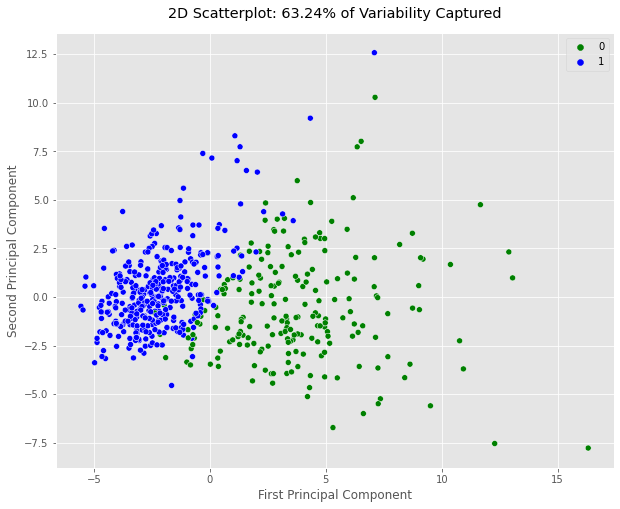

In [14]:
pca_2 = PCA(n_components=2, random_state=42)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(X_pca_2[:, 0], X_pca_2[:, 1], hue=cancer.target, palette=['green', 'blue'])
plt.title("2D Scatterplot: 63.24% of Variability Captured", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

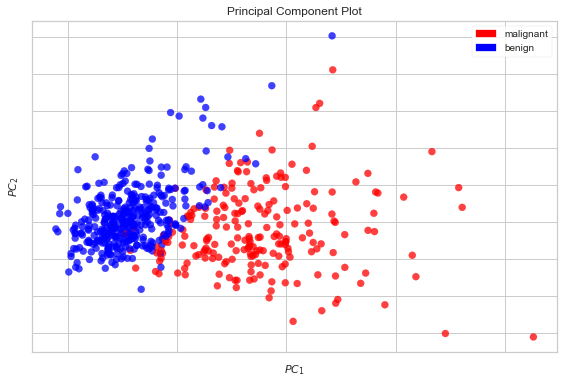

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [16]:
from yellowbrick.features import PCA

visualizer_2 = PCA(
    scale=True,
    projection=2,
    classes=['malignant', 'benign'],
    random_state=42,
    colors=['red', 'blue']
)

visualizer_2.fit_transform(X_scaled, cancer.target)
visualizer_2.show()


C:\Users\akuradz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


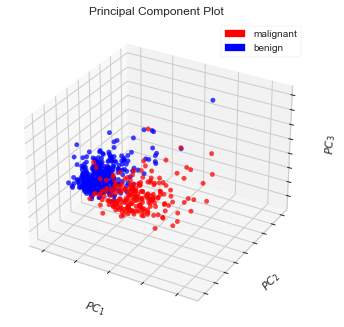

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [17]:
from yellowbrick.features import PCA

visualizer_2 = PCA(
    scale=True,
    projection=3,
    classes=['malignant', 'benign'],
    random_state=42,
    colors=['red', 'blue']
)

visualizer_2.fit_transform(X_scaled, cancer.target)
visualizer_2.show()